### **<h1>Data EXPOST&SMP</h1>**

In [1]:
# Imports
import pandas as pd
import plotly.graph_objects as go

# Permission to access my Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

EXPOST_PATH = "/content/drive/MyDrive/Doral_Energy/data/data_prep/data_expost.csv"
SMP_PATH = "/content/drive/MyDrive/Doral_Energy/data/data_prep/data_smp.csv"




Mounted at /content/drive


In [4]:
df_expost = pd.read_csv(EXPOST_PATH)
df_expost

,date,hour,cost(₪/MWh),renew_eng_prod(MW),conven_prod(MW),eco_demand(MW)
0,01/01/2021,00:00,157.05,4.0,7002.0,7006.0
1,01/01/2021,00:30,157.13,5.0,6682.0,6687.0
2,01/01/2021,01:00,157.13,4.0,6395.0,6399.0
3,01/01/2021,01:30,157.35,4.0,6147.0,6151.0
4,01/01/2021,02:00,157.24,3.0,5931.0,5934.0
...,...,...,...,...,...,...
33495,30/11/2022,21:30,535.09,153.0,8726.0,8879.0
33496,30/11/2022,22:00,535.56,150.0,8462.0,8612.0
33497,30/11/2022,22:30,535.09,11.0,8248.0,8259.0
33498,30/11/2022,23:00,535.09,7.0,7887.0,7894.0


In [5]:
df_smp = pd.read_csv(SMP_PATH)
df_smp

,date,hour,smp_const,smp_no_const
0,01/01/2021,00:00,117.24,113.80
1,01/01/2021,00:30,114.10,112.70
2,01/01/2021,01:00,111.19,111.19
3,01/01/2021,01:30,100.81,100.81
4,01/01/2021,02:00,110.02,110.02
...,...,...,...,...
33447,30/11/2022,21:30,102.44,129.85
33448,30/11/2022,22:00,102.45,175.90
33449,30/11/2022,22:30,102.45,122.00
33450,30/11/2022,23:00,102.45,112.77


In [6]:
# Merge the two data frames on the common columns 'date' and 'hour'
expost_smp_df = pd.merge(df_expost, df_smp, on=['date', 'hour'], how='inner')

In [7]:
expost_smp_df

,date,hour,cost(₪/MWh),renew_eng_prod(MW),conven_prod(MW),eco_demand(MW),smp_const,smp_no_const
0,01/01/2021,00:00,157.05,4.0,7002.0,7006.0,117.24,113.80
1,01/01/2021,00:30,157.13,5.0,6682.0,6687.0,114.10,112.70
2,01/01/2021,01:00,157.13,4.0,6395.0,6399.0,111.19,111.19
3,01/01/2021,01:30,157.35,4.0,6147.0,6151.0,100.81,100.81
4,01/01/2021,02:00,157.24,3.0,5931.0,5934.0,110.02,110.02
...,...,...,...,...,...,...,...,...
32871,30/11/2022,21:30,535.09,153.0,8726.0,8879.0,102.44,129.85
32872,30/11/2022,22:00,535.56,150.0,8462.0,8612.0,102.45,175.90
32873,30/11/2022,22:30,535.09,11.0,8248.0,8259.0,102.45,122.00
32874,30/11/2022,23:00,535.09,7.0,7887.0,7894.0,102.45,112.77


In [8]:
expost_smp_df.to_csv("expost_smp_data.csv", index=False)

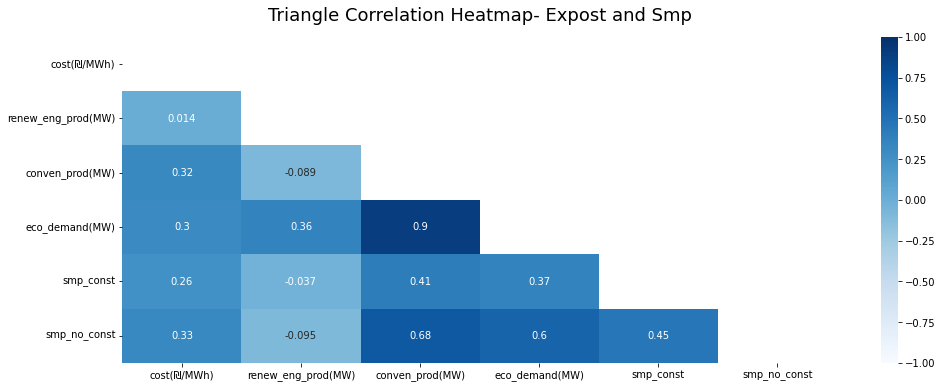

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Increase the size of the heatmap
plt.figure(figsize=(16, 6))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(expost_smp_df.corr(), dtype=np.bool_))

heatmap = sns.heatmap(expost_smp_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Triangle Correlation Heatmap- Expost and Smp', fontdict={'fontsize':18}, pad=16);